<a href="https://colab.research.google.com/github/snehalnlp/NLP_Practicals_Snehal_13/blob/main/Pracs8_Navybayesclassifier_snehal13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**8 - Classification**
1. Supervised Classification - Gender Identification
2. Choosing right features
3. Document classification
4. Sentence Segmentation
5. Naive Bayes Classifier


#1. Supervised Classification - Gender Identification

In [1]:
def gender_features(word):
       return {'last_letter': word[-1]}
       gender_features('Shrek')
{'last_letter': 'k'}

{'last_letter': 'k'}

In [2]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [3]:
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)

In [4]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [5]:
classifier.classify(gender_features('Neo'))

'male'

In [6]:
classifier.classify(gender_features('Trinity'))

'female'

In [7]:
print(nltk.classify.accuracy(classifier, test_set))

0.788


In [8]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     35.8 : 1.0
             last_letter = 'k'              male : female =     32.2 : 1.0
             last_letter = 'f'              male : female =     15.3 : 1.0
             last_letter = 'p'              male : female =     12.5 : 1.0
             last_letter = 'v'              male : female =     10.5 : 1.0


#2. Choosing right features


In [9]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

In [10]:
gender_features2('John') 

{'count(a)': 0,
 'count(b)': 0,
 'count(c)': 0,
 'count(d)': 0,
 'count(e)': 0,
 'count(f)': 0,
 'count(g)': 0,
 'count(h)': 1,
 'count(i)': 0,
 'count(j)': 1,
 'count(k)': 0,
 'count(l)': 0,
 'count(m)': 0,
 'count(n)': 1,
 'count(o)': 1,
 'count(p)': 0,
 'count(q)': 0,
 'count(r)': 0,
 'count(s)': 0,
 'count(t)': 0,
 'count(u)': 0,
 'count(v)': 0,
 'count(w)': 0,
 'count(x)': 0,
 'count(y)': 0,
 'count(z)': 0,
 'first_letter': 'j',
 'has(a)': False,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': True,
 'has(i)': False,
 'has(j)': True,
 'has(k)': False,
 'has(l)': False,
 'has(m)': False,
 'has(n)': True,
 'has(o)': True,
 'has(p)': False,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': False,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': False,
 'has(z)': False,
 'last_letter': 'n'}

In [11]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.764


In [12]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [13]:
 train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set)) 

0.763


In [14]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features(name))
  if guess != tag:
    errors.append( (tag, guess, name) )

In [15]:
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Abagail                       
correct=female   guess=male     name=Addis                         
correct=female   guess=male     name=Adrian                        
correct=female   guess=male     name=Alys                          
correct=female   guess=male     name=Ann                           
correct=female   guess=male     name=Ardys                         
correct=female   guess=male     name=Aurel                         
correct=female   guess=male     name=Ayn                           
correct=female   guess=male     name=Bab                           
correct=female   guess=male     name=Beitris                       
correct=female   guess=male     name=Bell                          
correct=female   guess=male     name=Bert                          
correct=female   guess=male     name=Bess                          
correct=female   guess=male     name=Bette-Ann                     
correct=female   guess=male     name=Betteann   

In [16]:
def gender_features(word):
     return {'suffix1': word[-1:],
             'suffix2': word[-2:]}

In [17]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.795


#3. Sentence Segmentation


In [18]:
import nltk                 
nltk.download('all')        #treebank

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [19]:
sents = nltk.corpus.treebank_raw.sents()
tokens = []
boundaries = set()
offset = 0
for sent in sents:
        tokens.extend(sent)
        offset += len(sent)
        boundaries.add(offset-1)

In [20]:
def punct_features(tokens, i):
     return {'next-word-capitalized': tokens[i+1][0].isupper(),
             'prev-word': tokens[i-1].lower(),
             'punct': tokens[i],
             'prev-word-is-one-char': len(tokens[i-1]) == 1}

In [21]:
featuresets = [(punct_features(tokens, i), (i in boundaries))
                for i in range(1, len(tokens)-1)
                if tokens[i] in '.?!']

In [22]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.936026936026936

#4. Document classification


In [23]:
from nltk.corpus import movie_reviews
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [24]:
documents = [(list(movie_reviews.words(fileid)), category)              
    for category in movie_reviews.categories()              
    for fileid in movie_reviews.fileids(category)]

In [25]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [26]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

{'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': False, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': True, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': True, 'contains(into)': True, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': True, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'contains

In [27]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [28]:
print(nltk.classify.accuracy(classifier, test_set))

0.78


In [29]:
classifier.show_most_informative_features(5)

Most Informative Features
    contains(recognizes) = True              pos : neg    =      8.1 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.8 : 1.0
    contains(schumacher) = True              neg : pos    =      7.8 : 1.0
        contains(turkey) = True              neg : pos    =      6.5 : 1.0
     contains(atrocious) = True              neg : pos    =      6.4 : 1.0


#5. Naive Bayes Classifier
https://www.geeksforgeeks.org/naive-bayes-classifiers/

In [30]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [31]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

In [32]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [33]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [35]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


#Naive Bayes Classifier
https://medium.com/analytics-vidhya/naive-bayes-classification-aa381b00dd45

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
df = pd.read_csv('/content/placement.csv')


In [39]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [40]:
df.shape

(215, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


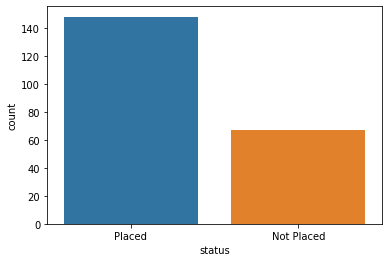

In [42]:
sns.countplot(x='status', data=df)

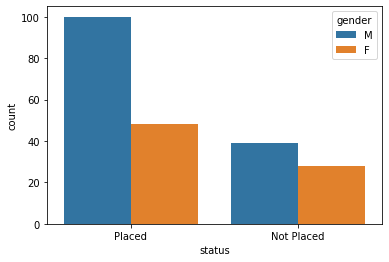

In [46]:
sns.countplot(x='status',hue='gender',data = df)

In [47]:
workexp= pd.get_dummies(df['workex'])
workexp

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
210,1,0
211,1,0
212,0,1
213,1,0


In [52]:
df=pd.concat([df,workexp],axis=1)
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,No,Yes,No,Yes
0,67.00,91.00,58.00,55.0,58.80,Placed,1,0,1,0
1,79.33,78.33,77.48,86.5,66.28,Placed,0,1,0,1
2,65.00,68.00,64.00,75.0,57.80,Placed,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,Not Placed,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,Placed,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed,1,0,1,0
211,58.00,60.00,72.00,74.0,53.62,Placed,1,0,1,0
212,67.00,67.00,73.00,59.0,69.72,Placed,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,Placed,1,0,1,0


In [64]:
df.drop(['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1, inplace=True)


KeyError: ignored

In [54]:
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [55]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_pred=model.predict(X_test)
df1=pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})
df1

,Actual Status,Predicted Status
108,Placed,Placed
207,Placed,Placed
106,Not Placed,Not Placed
107,Placed,Placed
51,Not Placed,Not Placed
...,...,...
114,Placed,Not Placed
127,Placed,Placed
116,Placed,Placed
117,Placed,Placed


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.64      0.90      0.75        20
      Placed       0.95      0.78      0.85        45

    accuracy                           0.82        65
   macro avg       0.79      0.84      0.80        65
weighted avg       0.85      0.82      0.82        65



In [58]:
print(confusion_matrix(y_test,y_pred))

[[18  2]
 [10 35]]


In [59]:
print(accuracy_score(y_test,y_pred)*100)

81.53846153846153
